Começamos abrindo e explorando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

df = pd.read_csv("exercicio_2408.csv", sep=';', index_col='Seq')
df.dropna(inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8
Seq,,,,,,,,
1.0,375.0,135.0,458.0,475.0,509.0,336.0,469.0,492.0
2.0,57.0,47.0,53.0,73.0,63.0,62.0,63.0,58.0
3.0,245.0,267.0,242.0,227.0,271.0,219.0,268.0,286.0
4.0,1472.0,1494.0,1462.0,1582.0,1613.0,1323.0,1490.0,1493.0
5.0,105.0,66.0,103.0,103.0,118.0,98.0,101.0,118.0
6.0,54.0,41.0,62.0,64.0,55.0,59.0,63.0,59.0
7.0,193.0,209.0,184.0,235.0,207.0,172.0,223.0,156.0
8.0,147.0,93.0,122.0,160.0,139.0,130.0,152.0,101.0
9.0,1102.0,674.0,957.0,1137.0,1058.0,990.0,1098.0,878.0


Como buscamos variações entre equipamentos (V1, V2, ... ) talvez seja melhor se tratarmos cada equipamento como uma ocorrência e cada sensor como uma característica.

In [2]:
# Trasposição linhas VS colunas
dft = df.transpose()
dft.describe()

Seq,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,406.125000,59.500000,253.125000,1491.125000,101.500000,57.125000,197.375000,130.500000,986.75000,686.625000,199.625000,718.125000,439.125000,205.50000,350.625000,1494.750000,157.000000
std,124.637116,7.745967,23.454744,86.688997,16.186414,7.434235,26.332693,23.982136,152.99183,210.654041,58.867739,87.633062,79.641047,21.45427,18.438605,188.474136,14.282857
min,135.000000,47.000000,219.000000,1323.000000,66.000000,41.000000,156.000000,93.000000,674.00000,320.000000,99.000000,586.000000,313.000000,176.00000,322.000000,1235.000000,138.000000
25%,365.250000,56.000000,238.250000,1469.500000,100.250000,54.750000,181.000000,116.750000,937.25000,612.500000,164.000000,667.500000,402.250000,195.25000,336.250000,1344.500000,145.000000
50%,463.500000,60.000000,256.000000,1491.500000,103.000000,59.000000,200.000000,134.500000,1024.00000,676.000000,209.500000,724.500000,451.000000,203.50000,354.000000,1539.000000,160.000000
75%,479.250000,63.000000,268.750000,1516.000000,108.250000,62.250000,212.500000,148.250000,1099.00000,758.500000,248.500000,783.500000,472.250000,211.75000,363.500000,1618.750000,167.750000
max,509.000000,73.000000,286.000000,1613.000000,118.000000,64.000000,235.000000,160.000000,1137.00000,1033.000000,265.000000,830.000000,570.000000,247.00000,376.000000,1734.000000,175.000000


Desta forma podemos vizualizar as diferenças entre cada equipamento quando monitorado por cada sensor.
Melhor visualizaçào em BOXPLOT

<Axes: >

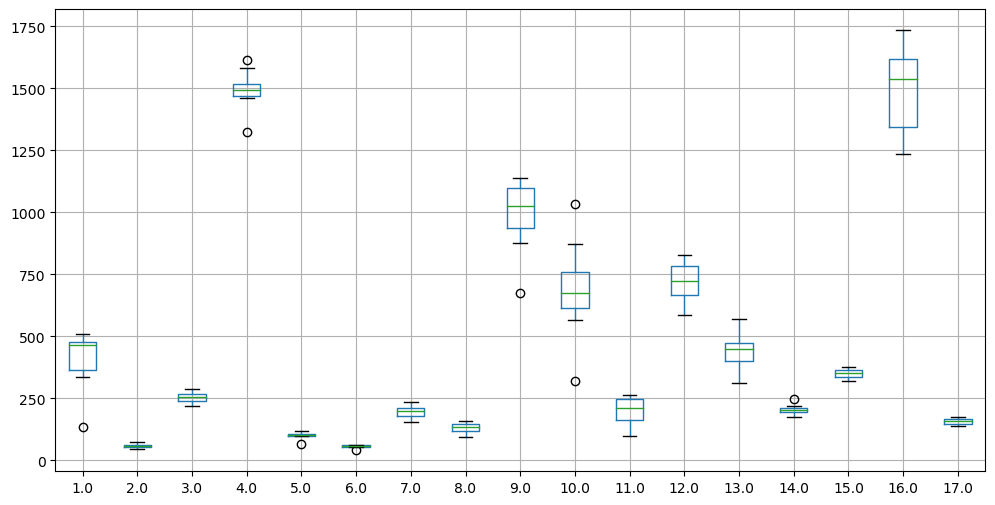

In [3]:
dft.boxplot(figsize=(12,6))  

Aqui já vemos que muitos sensores apresentam diferentes médias, diferentes variancias e até evidentes outliers. A presença de outliers (medições anormais) pode ser bom indicativo de não-conformidade/falha no equipamento.

Para melhor visualização e avaliação, molhor se normalizamos os dados (z-score)

In [4]:
# normalize mean and sdt (z-score)
for col in dft.columns:
    dft[col] = (dft[col] - dft[col].mean()) / dft[col].std()

Aproveitamos também para identificar quem são os outliers em termos de z-score

In [5]:
# who are the outliers
# upper: > Q3 + 1.5*(Q3-Q1)
# lower: < Q1 - 1.5*(Q3-Q1)

upper = []
lower = []
for col in dft.columns:
    if len(dft[dft[col] > dft[col].quantile(0.75) + 
                  1.5*(dft[col].quantile(0.75) - 
                       dft[col].quantile(0.25))]) > 0:
        upper.append(dft[dft[col] > dft[col].quantile(0.75) + 
                  1.5*(dft[col].quantile(0.75) - 
                       dft[col].quantile(0.25))].index[0])
    else:
        upper.append('-')

    if len(dft[dft[col] < dft[col].quantile(0.25) - 
                  1.5*(dft[col].quantile(0.75) - 
                       dft[col].quantile(0.25))]) > 0:
        lower.append(dft[dft[col] < dft[col].quantile(0.25) - 
                  1.5*(dft[col].quantile(0.75) - 
                       dft[col].quantile(0.25))].index[0])
    else:
        lower.append('-')

flyers = pd.DataFrame({'upper': upper, 'lower' : lower}, index=df.index)

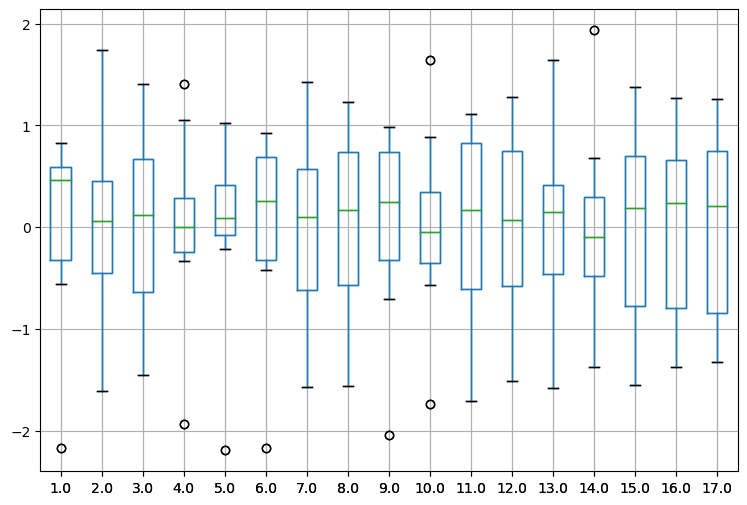

In [7]:
dft.boxplot(figsize=(9,6))
plt.show()

In [19]:
display(flyers.transpose())

Seq,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
upper,-,-,-,V5,-,-,-,-,-,V2,-,-,-,V5,-,-,-
lower,V2,-,-,V6,V2,V2,-,-,V2,V8,-,-,-,-,-,-,-


Já podemos ver que o equipamento V2 é o mais frequente outlier (5x) mas não o único.

O equipamento V5 aparece por duas vezes e os V6 e V8 uma cada um.

A função scipy.stats.norm.cdf() retorna a a distribuição acumulada de cada ponto. 

Assumindo que as medições de cada sensor em uma máquina em bom estado de funcionamento seguem uma distribuição normal de média mean e desvio padrão std, podemos dizer que a probabilidade de cada medição representar uma máquina saudável é a suma do valor acumulado da função de distribuição em cada lado da normal:

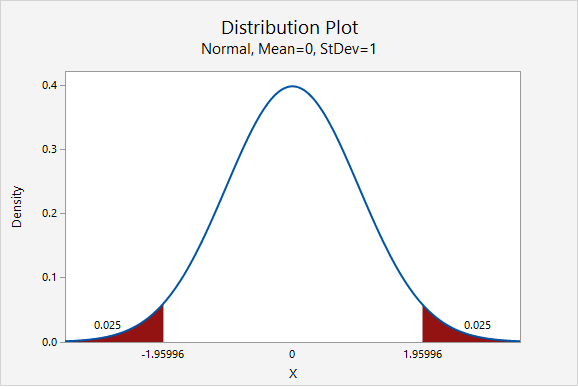

In [8]:
# Probability scores

dftt = abs(dft.transpose())
probs = pd.DataFrame(np.ones((17,8)) - (st.norm.cdf(dftt)-st.norm.cdf(-dftt)), columns = dftt.columns, index = df.index)
probs

,V1,V2,V3,V4,V5,V6,V7,V8
Seq,,,,,,,,
1.0,0.802800,0.029607,0.677258,0.580534,0.409147,0.573685,0.613935,0.490823
2.0,0.746886,0.106583,0.401387,0.081361,0.651378,0.746886,0.651378,0.846451
3.0,0.729033,0.554142,0.635273,0.265345,0.445997,0.145689,0.525950,0.161024
4.0,0.825391,0.973543,0.736893,0.294506,0.159757,0.052452,0.989646,0.982744
5.0,0.828808,0.028293,0.926165,0.926165,0.308026,0.828808,0.975357,0.308026
6.0,0.674228,0.030081,0.511985,0.355083,0.775001,0.800878,0.429374,0.800878
7.0,0.868044,0.658875,0.611507,0.153052,0.714727,0.335231,0.330491,0.116127
8.0,0.491445,0.117897,0.723016,0.218666,0.723016,0.983366,0.369985,0.218666
9.0,0.451265,0.040931,0.845820,0.326061,0.641422,0.983052,0.467126,0.477194


Aqui, cada valor representaria a probabilidade da medição estar representando uma máquina em bom funcionamento. A probabilidade de cada máquina estar em bom funcionamento é
1. A multiplicação das probabilidades de cada sensor?
2. A menor probabilidade?
3. A média das probabilidades?

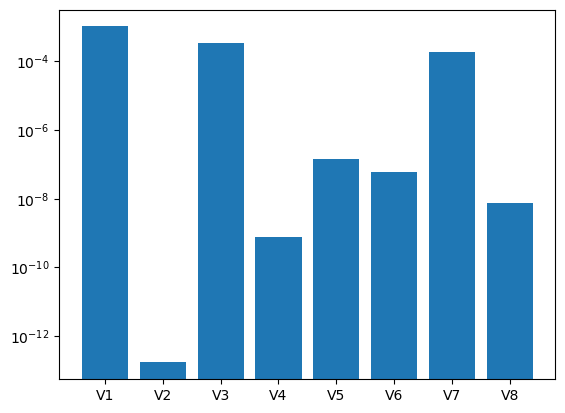

In [9]:
# 1 - Multiplicação

tprobs = probs.transpose()
total_prob = tprobs[1]
for col in tprobs.columns[1:]:
    total_prob = total_prob * tprobs[col]

fig, ax = plt.subplots()
plt.yscale('log')
ax.bar(total_prob.index, total_prob.values)
plt.show()

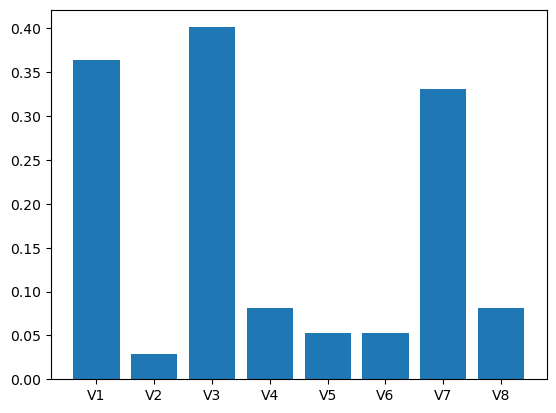

In [10]:
# 2 - Mais baixa prob
fig, ax = plt.subplots()
ax.bar(probs.min().index,probs.min().values)
plt.show()

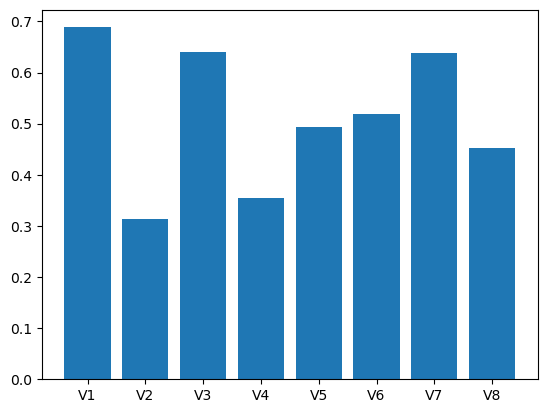

In [11]:
# 3 - Media das probs
fig, ax = plt.subplots()
ax.bar(probs.mean().index,probs.mean().values)
plt.show()

Em todos os casos a máquina 2 sobresai como a com menor probabilidade de estar em bom funcionamento.